In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [9]:
digit_mnist=keras.datasets.mnist
(X_train_full,Y_train_full),(X_test_full,Y_test_full)=digit_mnist.load_data()

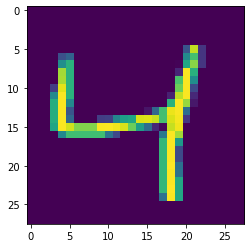

In [10]:
plt.imshow(X_train_full[2])

In [11]:
class_name=["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

In [13]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
Y_valid,Y_train=Y_train_full[:6000],Y_train_full[6000:]

In [26]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [28]:
model_history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_valid,Y_valid))

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6108 - accuracy: 0.8471 - val_loss: 0.3052 - val_accuracy: 0.9153
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.9173 - val_loss: 0.2448 - val_accuracy: 0.9340
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2383 - accuracy: 0.9314 - val_loss: 0.2116 - val_accuracy: 0.9413
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2044 - accuracy: 0.9417 - val_loss: 0.1848 - val_accuracy: 0.9493
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1791 - accuracy: 0.9479 - val_loss: 0.1654 - val_accuracy: 0.9542
Epoch 6/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1593 - accuracy: 0.9544 - val_loss: 0.1519 - val_accuracy: 0.9573
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1432 - accuracy: 0.9597 - val_loss: 0.1376 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1688}

In [30]:
model_history.history

{'loss': [0.610835075378418,
  0.2889859974384308,
  0.23831872642040253,
  0.20441900193691254,
  0.17908096313476562,
  0.15934249758720398,
  0.14324454963207245,
  0.12988609075546265,
  0.11857739835977554,
  0.10899847745895386,
  0.10023882985115051,
  0.09321118146181107,
  0.0860915333032608,
  0.08005792647600174,
  0.07487072050571442,
  0.07007883489131927,
  0.06553288549184799,
  0.06110404431819916,
  0.057766448706388474,
  0.05409804359078407,
  0.05104928836226463,
  0.04819343611598015,
  0.04525858536362648,
  0.04263516888022423,
  0.04037495329976082,
  0.03794671967625618,
  0.035974882543087006,
  0.03403236344456673,
  0.03203057870268822,
  0.030278446152806282],
 'accuracy': [0.8471481204032898,
  0.917296290397644,
  0.9313703775405884,
  0.9416666626930237,
  0.9479444622993469,
  0.9543518424034119,
  0.9597407579421997,
  0.9628888964653015,
  0.9663147926330566,
  0.9682592749595642,
  0.9717962741851807,
  0.9732778072357178,
  0.9760370254516602,
  0.9

In [31]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 12.5936 - accuracy: 0.9761


[12.593561172485352, 0.9761000275611877]

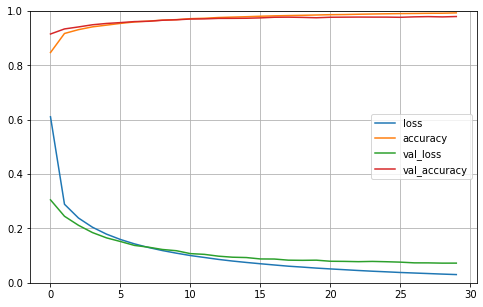

In [32]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [33]:
X_new=X_test[:5]

In [34]:
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred=model.predict(X_new)
classes_x=np.argmax(y_proba,axis=1)

In [36]:
classes_x

array([7, 2, 1, 0, 4], dtype=int64)

In [38]:
np.array(class_name)[classes_x]

array(['Seven', 'Two', 'One', 'Zero', 'Four'], dtype='<U5')

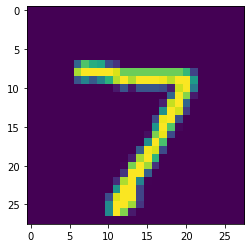

In [39]:
plt.imshow(X_test[0])